In [1]:
import pandas as pd
import os

import warnings
warnings.filterwarnings("ignore")

#### 1. Соберем все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).

In [2]:
root_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/shared/homeworks/python_ds_miniprojects/4/data/'
df_list = []

for date in os.listdir(root_path):
    for name in os.listdir(root_path + date):
        if name.startswith('.'):
            continue
        file_path = f'{root_path}{date}/{name}/data.csv'
        t_df = pd.read_csv(file_path, sep = ',', index_col = 0)
        t_df['name'], t_df['date'] = name, date
        df_list.append(t_df)
df = pd.concat(df_list).reset_index().drop('index', 1)
df.head()

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05


In [8]:
#второй вариант
#tree = os.walk('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/shared/homeworks/python_ds_miniprojects/4/data/')
#df = pd.DataFrame(columns = ['product_id', 'quantity', 'name', 'date'])
#for i in tree:
    #if i[-1] == ['data.csv']:
        #df_i = pd.read_csv(i[0] + '/data.csv', usecols = ['product_id', 'quantity'])
        #i = i[0].split('/')
        #df_i['name'] = i[-1]
        #df_i['date'] = i[-2]
        #df = pd.concat([df, df_i], ignore_index=True)
#print(df)

#### 2. Выясним, какой пользователь купил больше всего товаров

In [4]:
df.groupby('name', as_index=False).agg({'quantity':'sum'})\
    .sort_values('quantity', ascending=False).head()

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28


In [6]:
#либо
quantity_of_products = df.groupby('name').quantity.sum()
max_quantity = quantity_of_products.max()
max_quantity

52

In [7]:
quantity_of_products.loc[quantity_of_products == max_quantity].index.sort_values()

Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

#### 3.Найдем топ-10 товаров по числу проданных единиц за всё время и построим барплот

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df2 = df.groupby('product_id', as_index=False)\
                  .agg({'quantity':'sum'}).sort_values('quantity', ascending=False).head(10)

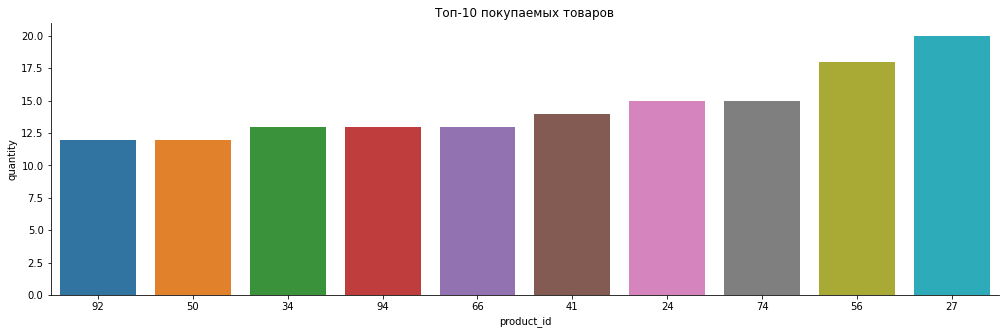

In [16]:
fig, ax = plt.subplots(figsize=(17,5))
sns.barplot(data=df2, x='product_id', y='quantity',
            order=df2.sort_values('quantity').product_id, ax=ax)
ax.set_title('Топ-10 покупаемых товаров')
sns.despine()

#### 4.Посмотрим на продажи по дням! Для визуализации снова используем барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

In [17]:
df3 = df.groupby('date', as_index=False)\
        .agg({'quantity':'sum'}).sort_values('quantity', ascending=False)
df3

,date,quantity
1,2020-12-04,113
4,2020-12-07,94
6,2020-12-09,69
5,2020-12-08,68
2,2020-12-05,61
0,2020-12-03,60
3,2020-12-06,15


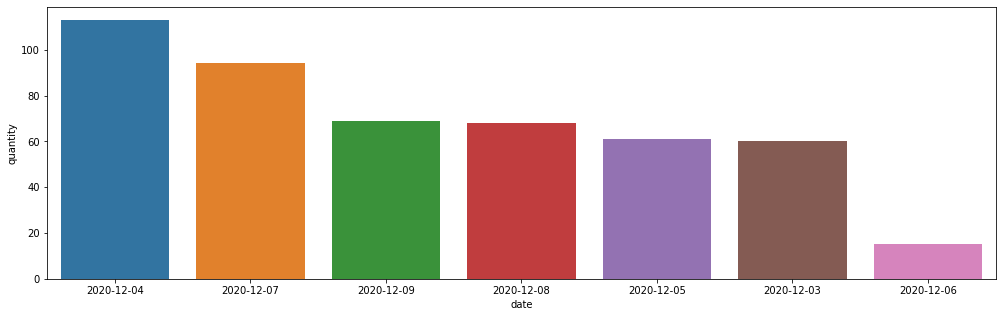

In [18]:
fig, ax = plt.subplots(figsize=(17,5))
ax = sns.barplot(x="date", y = "quantity", data =df3)
sns.set(rc = {'figure.figsize':(16,8)})

* Максимальное число товаров было продано 4 декабря
* 8 и 9 декабря было продано примерно одинаковое число товаров
* 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* Меньше всего товаров было приобретено 6 декабря

#### 5.Поситчаем сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 
Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

In [19]:
df4 = df.drop_duplicates(subset = ['product_id', 'name', 'date'])

In [20]:
df4.shape

(160, 4)

удалился один дупликат

In [21]:
df4.groupby(['product_id', 'name'], as_index=False)\
    .agg({'date':'count'})\
    .query('date > 1')

,product_id,name,date
24,15,Anton_Ivanov,2
150,94,Petr_Fedorov,2
